# Problem Statement : : Create an ANN Classification model to predict the Customer Churn # of different customers.


# Confusion Matrix

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('Churn_Modelling.csv')

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df=data
df.shape

(10000, 14)

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [14]:
len(df[df.duplicated()])

0

In [15]:
df.drop_duplicates(inplace=True)

# Data Preprocessing

In [16]:
# Removing the unnecassary features from the dataset

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)



print(data.columns)
     

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [17]:
data.shape

(10000, 11)

In [18]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = data.iloc[:,0:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)
#print(y)

(10000, 10)
(10000,)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [19]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

x = pd.get_dummies(x)

x.head()
     

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [20]:
x.shape

(10000, 13)

# To check the null Values

In [21]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [26]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='object']

In [27]:
print(cat_feature)

['Surname', 'Geography', 'Gender']


In [28]:
for feature in cat_feature:
    print(df[feature].value_counts())

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


 # Split test and train data

In [29]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 13)
(7500,)
(2500, 13)
(2500,)


In [30]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.735507,0.015266,0.008860,0.673160,2.535034,-1.553624,-1.034460,-1.640810,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,1.024427,-0.652609,0.008860,-1.207724,0.804242,0.643657,-1.034460,-0.079272,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,0.808295,-0.461788,1.393293,-0.356937,0.804242,0.643657,0.966688,-0.996840,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,0.396614,-0.080145,0.008860,-0.009356,-0.926551,0.643657,0.966688,-1.591746,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-0.467915,1.255605,0.701077,-1.207724,0.804242,0.643657,0.966688,1.283302,0.984651,-0.568112,-0.574682,-0.919743,0.919743


In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']],df.Exited,train_size=0.8)

In [33]:
X_test

,Age
2830,53
8243,29
2735,30
6646,42
3316,53
...,...
2123,25
1471,48
6780,37
7655,38


In [34]:
y_test

2830    0
8243    0
2735    0
6646    0
3316    1
       ..
2123    0
1471    0
6780    0
7655    0
5804    1
Name: Exited, Length: 2000, dtype: int64

In [35]:
print(np.shape(y_test))
print(np.shape(predicted_labels))


(2000,)


NameError: name 'predicted_labels' is not defined

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_predicted = model.predict(X_test)

In [39]:
predicted_labels

NameError: name 'predicted_labels' is not defined

In [40]:
y_test

2830    0
8243    0
2735    0
6646    0
3316    1
       ..
2123    0
1471    0
6780    0
7655    0
5804    1
Name: Exited, Length: 2000, dtype: int64

In [41]:
print(np.shape(y_test))
print(np.shape(predicted_labels))


(2000,)


NameError: name 'predicted_labels' is not defined

In [42]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [43]:
new_df=df.drop(['Exited','RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],axis='columns')
new_df

,Age
0,42
1,41
2,42
3,39
4,43
...,...
9995,39
9996,35
9997,36
9998,42


In [44]:
Exited=df.Exited
Exited

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [45]:
reg= linear_model.LinearRegression()
reg.fit(new_df,Exited)

LinearRegression()

# Predict the age with Exited(0,1)

In [46]:
reg.predict([[42]])

array([0.23742909])

In [47]:
reg.coef_

array([0.01095741])

In [48]:
reg.intercept_

-0.22278197445968773

In [49]:
reg.predict([[54]])

array([0.36891796])

# Decision tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier() 
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuaracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_predicted)
print(cm)

Training Accuracy : 1.0


ValueError: Found input variables with inconsistent numbers of samples: [2000, 2500]

 # Logistic Regression

In [63]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_predicted)
print(cm)

Training Accuracy : 0.7946666666666666


ValueError: Found input variables with inconsistent numbers of samples: [2000, 2500]

# Artificial neural networks

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense
     

In [53]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()

# first hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=13))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# output layer
# Assuming you have a binary classification problem, use 'sigmoid' activation for binary output
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 0,epochs = 50)


ValueError: Data cardinality is ambiguous:
  x sizes: 7500
  y sizes: 8000
Make sure all arrays contain the same number of samples.

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


In [54]:
y_train = y_train[:7500]


In [55]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')


In [56]:
y_train = y_train.ravel()


In [57]:
# creating the model
model = Sequential()

from keras.layers import Dropout

# first hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=13))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# output layer
# Assuming you have a binary classification problem, use 'sigmoid' activation for binary output
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 0, epochs = 50)


Epoch 1/50


235/235 [==============================] - 1s 1ms/step - loss: 0.5866 - accuracy: 0.7947
Epoch 2/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.7947
Epoch 3/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.7947
Epoch 4/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.7947
Epoch 5/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.7947
Epoch 6/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7947
Epoch 7/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7947
Epoch 8/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5070 - accuracy: 0.7947
Epoch 9/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.7947
Epoch 10/50
235/235 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.79

In [58]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [59]:
predicted_labels = np.argmax(y_predicted, axis=0)

Text(95.72222222222221, 0.5, 'Truth')

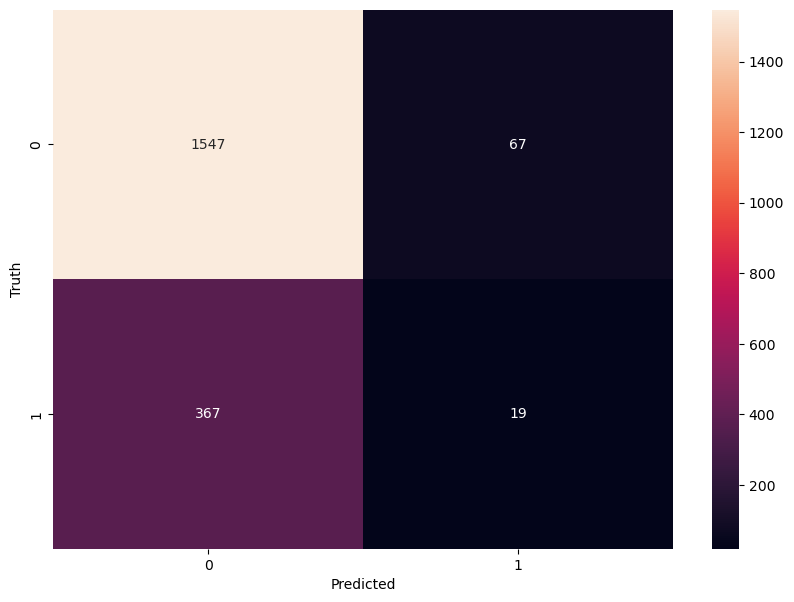

In [64]:
import seaborn as sn

import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
y_test.shape

(2000,)

In [66]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1614
           1       0.22      0.05      0.08       386

    accuracy                           0.78      2000
   macro avg       0.51      0.50      0.48      2000
weighted avg       0.69      0.78      0.72      2000

